In [2910]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from FDApy.preprocessing.smoothing.local_polynomial import LocalPolynomial
from FDApy.representation.simulation import Brownian
import FDApy
import torch

In [2911]:
realwage = pd.read_csv("partite.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
realwage

Game       Game0529-1                                        Game0529-2       \
Player              b                        w                        b        
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed Evaluation   HR   
Time                                                                           
0               -0.57 -2.0      0.0       0.57  4.0      0.0      -0.57 -3.0   
1               -0.57 -1.0      0.0       0.57  3.0      0.0      -0.57 -3.0   
2               -0.57 -2.0      0.0       0.57  2.0      0.0      -0.57 -2.0   
3               -0.45 -1.0      3.0       0.45  1.0      3.0      -0.43 -2.0   
4               -0.45  0.0      3.0       0.45  0.0      3.0      -0.33 -1.0   
...               ...  ...      ...        ...  ...      ...        ...  ...   
1185              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1186              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1187              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1188              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   
1189              NaN  NaN      NaN        NaN  NaN      NaN        NaN  NaN   

Game                            ... Game0816-6                           \
Player                       w  ...          b          w                 
Statistics TimeUsed Evaluation  ...   TimeUsed Evaluation   HR TimeUsed   
Time                            ...                                       
0               0.0       0.57  ...        0.0       0.55 -2.0      0.0   
1               0.0       0.57  ...        0.0       0.55  0.0      0.0   
2               0.0       0.57  ...        0.0       0.55  0.0      0.0   
3               3.0       0.43  ...        0.0       0.55  1.0      0.0   
4               3.0       0.33  ...        0.0       0.55  1.0      0.0   
...             ...        ...  ...        ...        ...  ...      ...   
1185            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1186            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1187            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1188            NaN        NaN  ...        NaN        NaN  NaN      NaN   
1189            NaN        NaN  ...        NaN        NaN  NaN      NaN   

Game       Game0816-7                                         
Player              b                        w                
Statistics Evaluation   HR TimeUsed Evaluation   HR TimeUsed  
Time                                                          
0               -0.38 -4.0      0.0       0.38 -2.0      0.0  
1               -0.38 -3.0      0.0       0.38 -2.0      0.0  
2               -0.38 -2.0      0.0       0.38 -1.0      0.0  
3               -0.31 -2.0      3.0       0.31 -1.0      3.0  
4               -0.75 -1.0      3.0       0.75  1.0      3.0  
...               ...  ...      ...        ...  ...      ...  
1185             0.03  7.0    592.0      -0.03  6.0    592.0  
1186             0.39  7.0    599.0      -0.39  7.0    599.0  
1187             0.39  7.0    599.0      -0.39  7.0    599.0  
1188             5.75  7.0    599.0      -5.75  7.0    599.0  
1189            -0.22  7.0    599.0       0.22  5.0    599.0  

[1190 rows x 108 columns]

In [2912]:
def heart_rate_delta(dataframe, color,game):
    df = dataframe.iloc[:10]
    return np.sum(df[game][color]['HR'])//10

## Analisi bivariata con due variabili quantitative

<AxesSubplot:xlabel='HR', ylabel='Evaluation'>

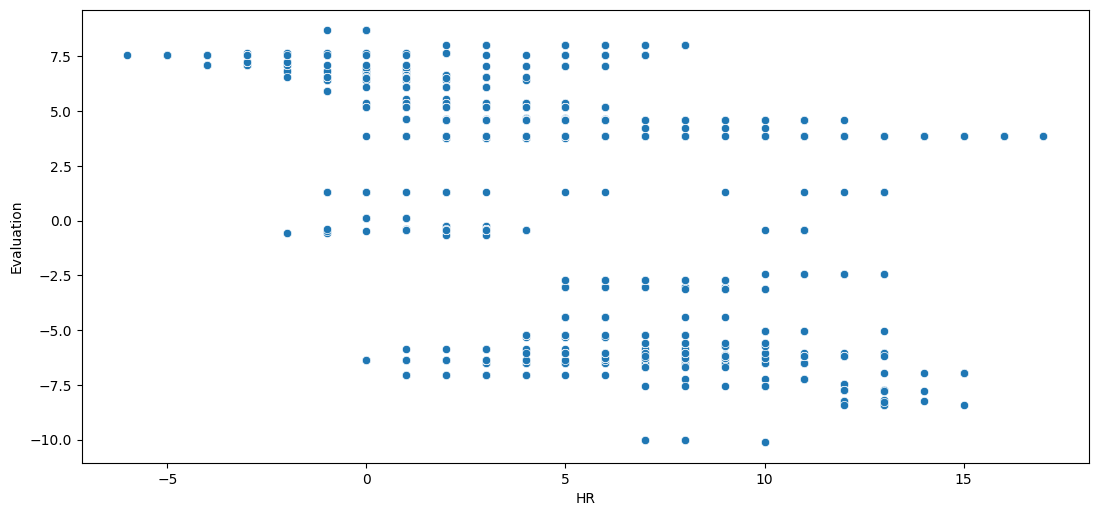

In [2913]:
#diagramma a dispersione
sns.scatterplot(x=realwage['Game0529-1']['b']['HR'], y=realwage['Game0529-1']['b']['Evaluation'], data=realwage)


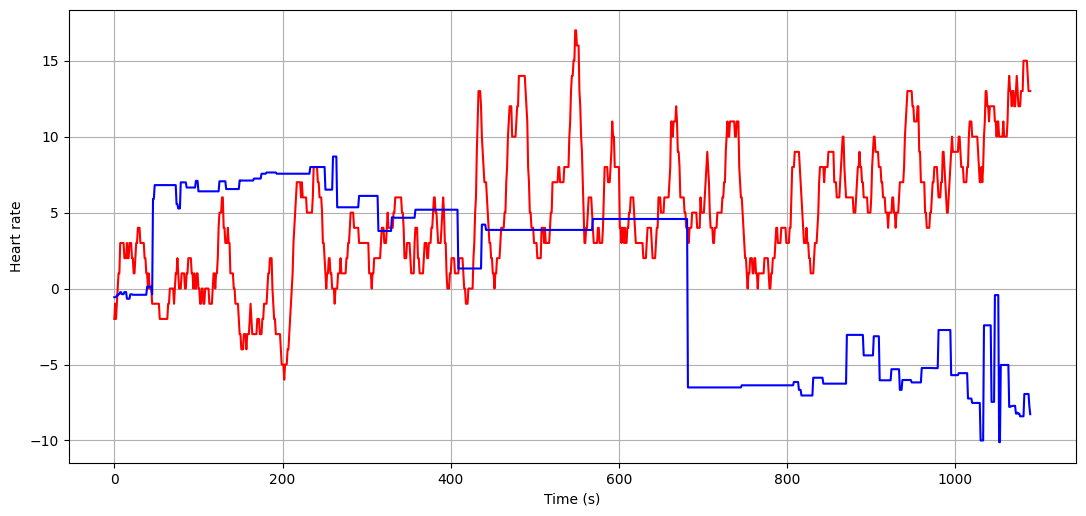

In [2914]:
realwage = pd.read_csv("partite.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb = realwage['Game0529-1']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-1')


t = realwage.index
eb = realwage['Game0529-1']['b']['Evaluation']
plt.grid()
plt.plot(t,hb, 'r')
plt.plot(t,eb,'b')
plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()


<AxesSubplot:>

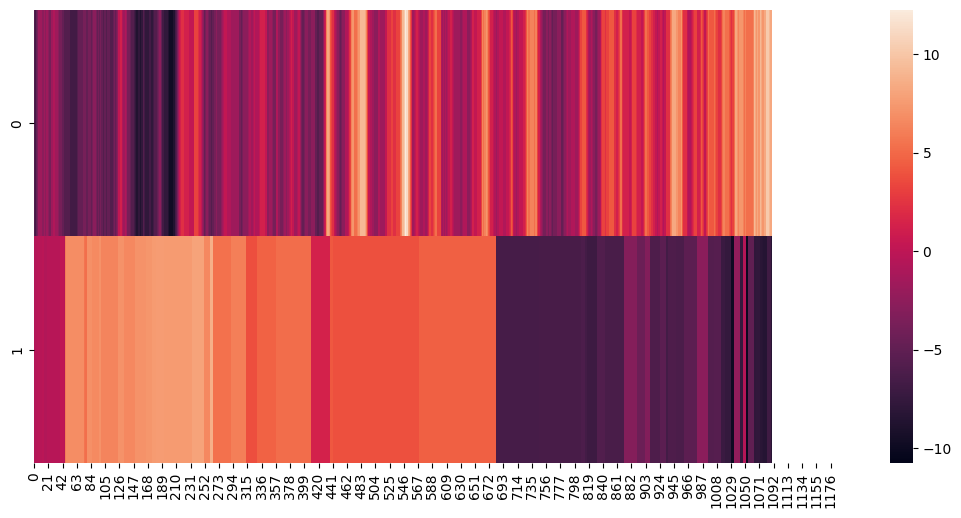

In [2915]:
#heatmap or correlation matrix

hrw = realwage['Game0529-1']['b']['HR'] - realwage['Game0529-1']['b']['HR'].mean()
evw=realwage['Game0529-1']['b']['Evaluation']
df = np.array([hrw,evw])
sns.heatmap(df)


In [2916]:
df1 = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})
df1.corr()


x1        x2        x3
x1  1.000000  0.648098 -0.805834
x2  0.648098  1.000000 -0.463782
x3 -0.805834 -0.463782  1.000000

## Multivariate Normality Test
Used to determine whether a set of multivariate observations could have come from a multivariate normal distribution.A multivariate normal distribution for m variables is characterized by m means, m variances and $ \frac{m(m-1)}{2} $ covariances or correlations and the marginal distribution of each variable is normal.

- $ H_0 $: the variables come from a Multivariate Normal Distribution
- $ H_A $: the variables don't come from a Multivariate Normal Distribution

### Henze-Zirkler Multivariate Normality Test

In [2917]:
from pingouin import multivariate_normality

#create a dataset with three variables x1, x2, and x3
df = pd.DataFrame({'x1':t,
                   'x2': hb,
                   'x3': eb})

#perform the Henze-Zirkler Multivariate Normality Test
multivariate_normality(df, alpha=.05)



HZResults(hz=29.16836390373557, pval=3.8969463107127007e-138, normal=False)

Since in the above example, the p-value is 1.2e-130 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a multivariate normal distribution.

In [2918]:
test_stat_normality, p_value_normality=stats.shapiro(df)
p_value_normality


1.0

check variance homogeneity

In [2919]:
test_stat_var, p_value_var= stats.levene(hb,eb)
p_value_var

nan

We reject the null hypothesis, the variances of the samples ar not the same

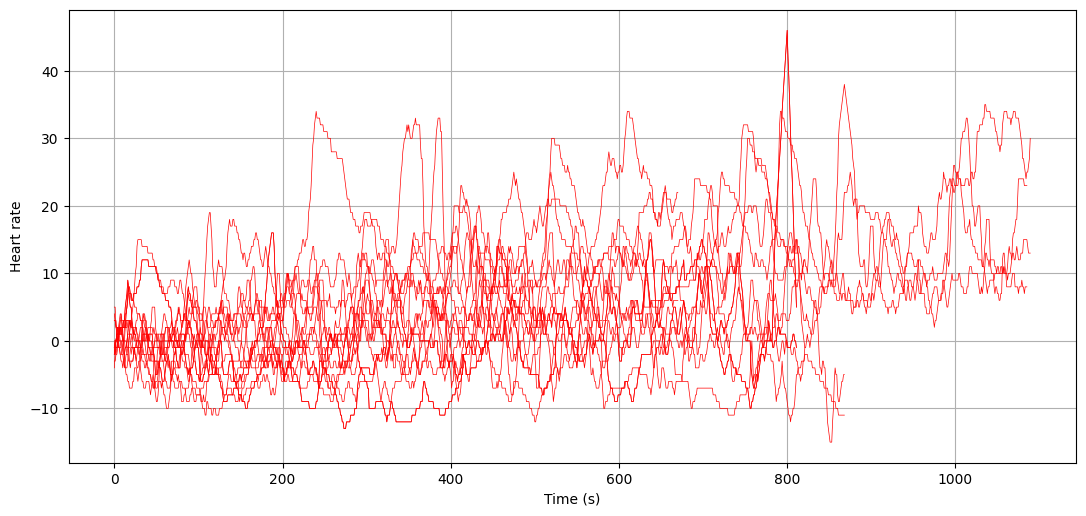

In [2920]:
drealwage = pd.read_csv("partite.csv")
realwage = pd.read_csv("partite.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])

plt.rcParams["figure.figsize"] = (13,6)
hb0 = realwage['Game0529-1']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-1')
hb1 = realwage['Game0529-2']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-2')
hb2 = realwage['Game0529-3']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-3')
hb3 = realwage['Game0816-6']['b']['HR'] - heart_rate_delta(realwage,'b','Game0816-6')
hb4 = realwage['Game0529-5']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-5')
hb5 = realwage['Game0814-2']['b']['HR'] - heart_rate_delta(realwage,'b','Game0814-2')
hb6 = realwage['Game0816-6']['b']['HR'] - heart_rate_delta(realwage,'b','Game0816-6')
hb7 = realwage['Game0816-1']['b']['HR'] - heart_rate_delta(realwage,'b','Game0816-1')

hw0 = realwage['Game0529-1']['w']['HR'] - heart_rate_delta(realwage,'w','Game0529-1')
hw1 = realwage['Game0529-2']['w']['HR'] - heart_rate_delta(realwage,'w','Game0529-2')
hw2 = realwage['Game0529-3']['w']['HR'] - heart_rate_delta(realwage,'w','Game0529-3')
hw3 = realwage['Game0816-6']['w']['HR'] - heart_rate_delta(realwage,'w','Game0816-6')
hw4 = realwage['Game0529-5']['w']['HR'] - heart_rate_delta(realwage,'w','Game0529-5')
hw5 = realwage['Game0814-2']['w']['HR'] - heart_rate_delta(realwage,'w','Game0814-2')
hw6 = realwage['Game0816-6']['w']['HR'] - heart_rate_delta(realwage,'w','Game0816-6')
hw7 = realwage['Game0816-1']['w']['HR'] - heart_rate_delta(realwage,'w','Game0816-1')

t = realwage.index

plt.grid()
plt.plot(t,hb0, 'red',linewidth=0.5)
plt.plot(t,hb1,'red',linewidth=0.5)
plt.plot(t,hb2,'red',linewidth=0.5)
plt.plot(t,hb3,'red',linewidth=0.5)
plt.plot(t,hb4,'red',linewidth=0.5)
plt.plot(t,hb5,'red',linewidth=0.5)
plt.plot(t,hb6,'red',linewidth=0.5)
plt.plot(t,hb7,'red',linewidth=0.5)

plt.plot(t,hw0, 'red',linewidth=0.5)
plt.plot(t,hw1,'red',linewidth=0.5)
plt.plot(t,hw2,'red',linewidth=0.5)
plt.plot(t,hw3,'red',linewidth=0.5)
plt.plot(t,hw4,'red',linewidth=0.5)
plt.plot(t,hw5,'red',linewidth=0.5)
plt.plot(t,hw6,'red',linewidth=0.5)
plt.plot(t,hw7,'red',linewidth=0.5)

plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()

In [2921]:
X = t
Y = hb0
print(Y)


Time
0      -2.0
1      -1.0
2      -2.0
3      -1.0
4       0.0
       ... 
1185    NaN
1186    NaN
1187    NaN
1188    NaN
1189    NaN
Name: HR, Length: 1190, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

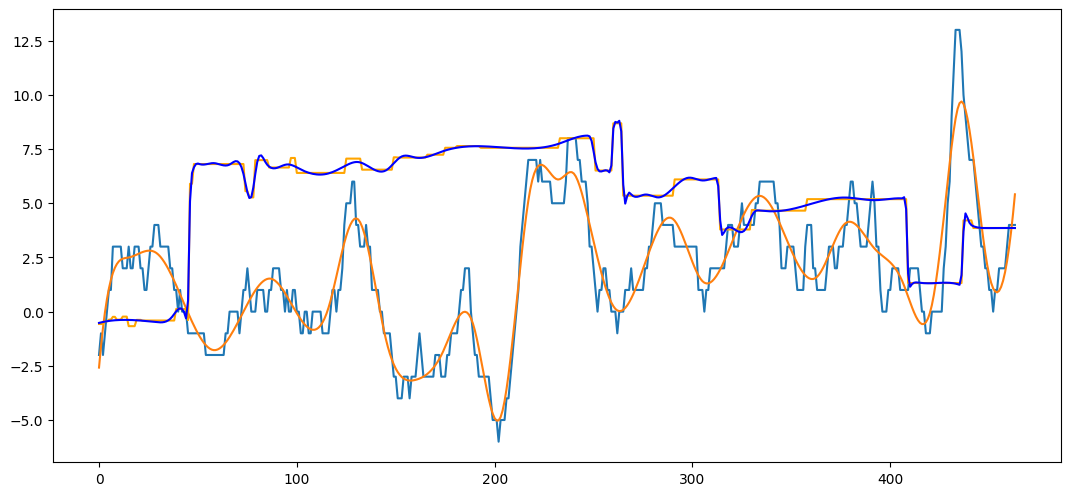

In [2922]:
from scipy.interpolate import UnivariateSpline
realwage = realwage.dropna(axis=0)
hb0 = realwage['Game0529-1']['b']['HR'] - heart_rate_delta(realwage,'b','Game0529-1')
t = realwage.index
spl = UnivariateSpline(t, hb0)

eb0 = realwage['Game0529-1']['b']['Evaluation'] 
sple = UnivariateSpline(t, eb0)
sple.set_smoothing_factor(10)
plt.plot(t,hb0)
plt.plot(t, spl(t))
plt.plot(t,eb0, color='orange')
plt.plot(t, sple(t),color='b')
plt.show

In [2923]:
# from scipy import interpolate
# realwage = realwage.dropna(axis=0)
# hb0 = realwage['Game0']['b']['HR'] - heart_rate_delta(realwage,'b','Game0')
# t = realwage.index
# spl = interpolate.splrep(t,hb0, k=3)

# t_new = np.linspace(min(t),max(t),464)
# hb0_smooth = interpolate.BSpline(*spl)(t_new)
# plt.plot(t,hb0, color= 'r')
# plt.plot(t_new, hb0_smooth, color = 'b')

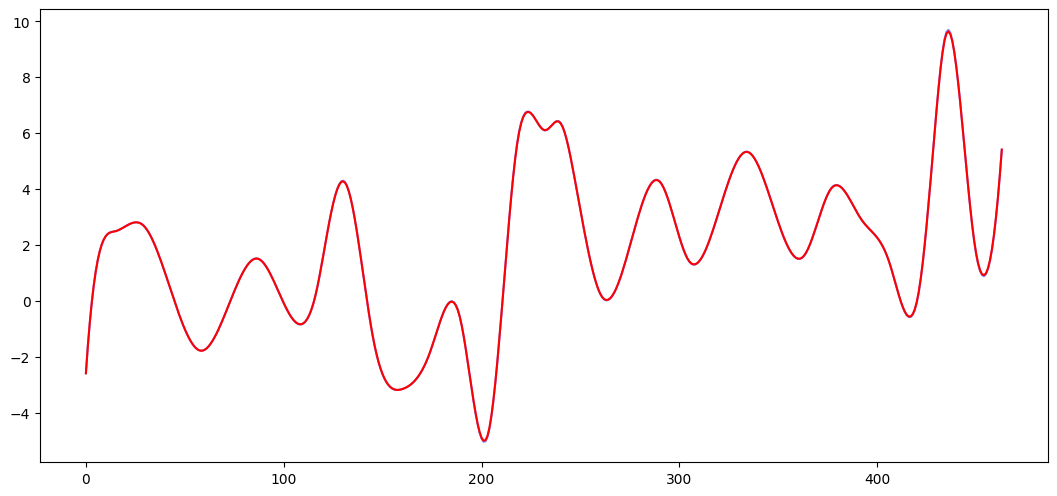

In [2924]:
lp = LocalPolynomial(kernel_name="epanechnikov", bandwidth=2, degree=2)
# hb0_pred
# = np.array(hb0_pred
#.reset_index(drop=True))
hb0_pred = spl(t)
t = np.array(t)
lp.fit(t, hb0_pred)
plt.plot(t, hb0_pred, alpha=0.5, color='blue', label='Noisy')
plt.plot(np.sort(t), lp.X_fit_, color='red', label='Estimated')

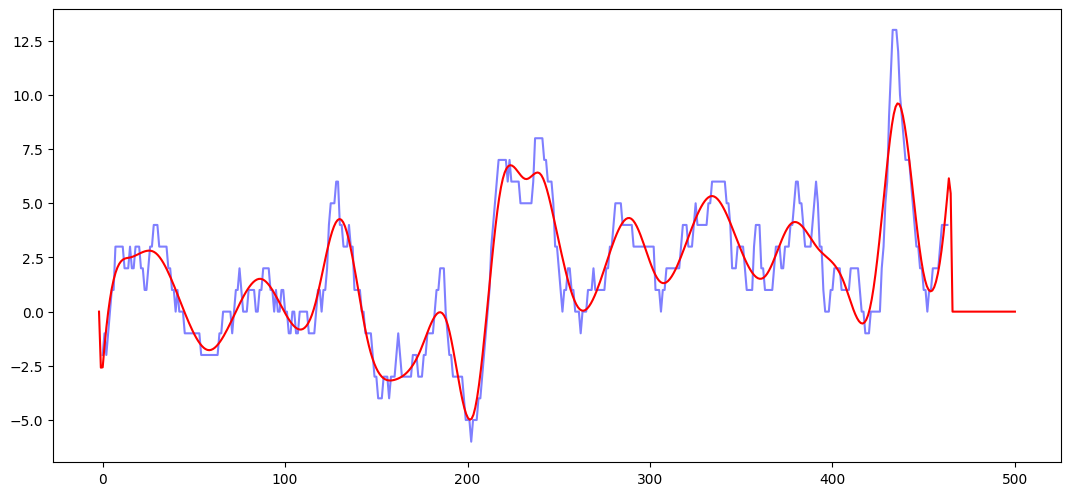

In [2925]:
y_pred = lp.predict(np.linspace(-2, 500, 500))
plt.plot(t, hb0, alpha=0.5, color='blue', label='noisy')
plt.plot(np.linspace(-2, 500, 500), y_pred, color='red', label='Prediction')

In [2926]:
realwage = realwage.dropna(axis=1)
X = pd.DataFrame({'x1':t,
                   'x2': hb0})
X = np.array([t,hb0])
X0 = np.mgrid[-500:500:5, -50:50:5] 
X0 = np.vstack([X0[0].ravel(), X0[1].ravel()])              
Y = realwage['Game0529-1']['b']['Evaluation']
Y = np.array(Y)

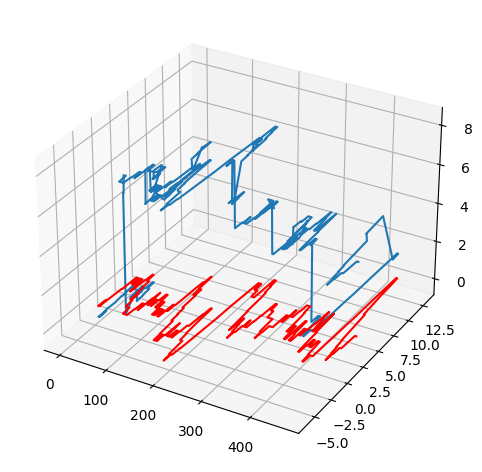

In [2927]:
# Fit local polynomials
lp = LocalPolynomial(kernel_name="epanechnikov", bandwidth=2, degree=1)
lp.fit(X, Y)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.plot(X[0], X[1], Y)
_ = ax.plot(X[0], X[1], lp.X_fit_, color='red')

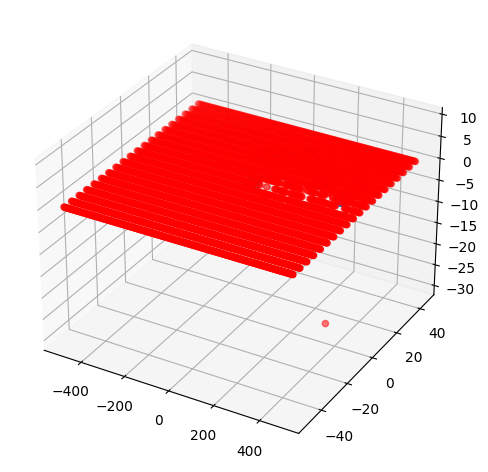

In [2928]:
#non so perchè viene così
#penso che lo toglierò

y_pred = lp.predict(X0)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(X[0], X[1], Y)
_ = ax.scatter(X0[0], X0[1], y_pred, color='red')

In [2929]:
def adjust(col, length):
    col = col[~np.isnan(col)]
    col_length = len(col)
    count = 1
    missing = length - col_length
    
    if missing != 0:
        rate = col_length//missing
        if rate >  1:
           
            while col_length < length:
                
                count += rate
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
        if rate == 1 :
            while col_length < length:
                
                count += rate +1 
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
        else:
            
            while col_length < length:
                count += 3
                value =  col[count-1]
                col=np.insert(col, count, value)
                col_length=len(col)
                if col_length != length:
                    col=np.insert(col, count, value)
                    col_length=len(col)
    return col

<function matplotlib.pyplot.show(close=None, block=None)>

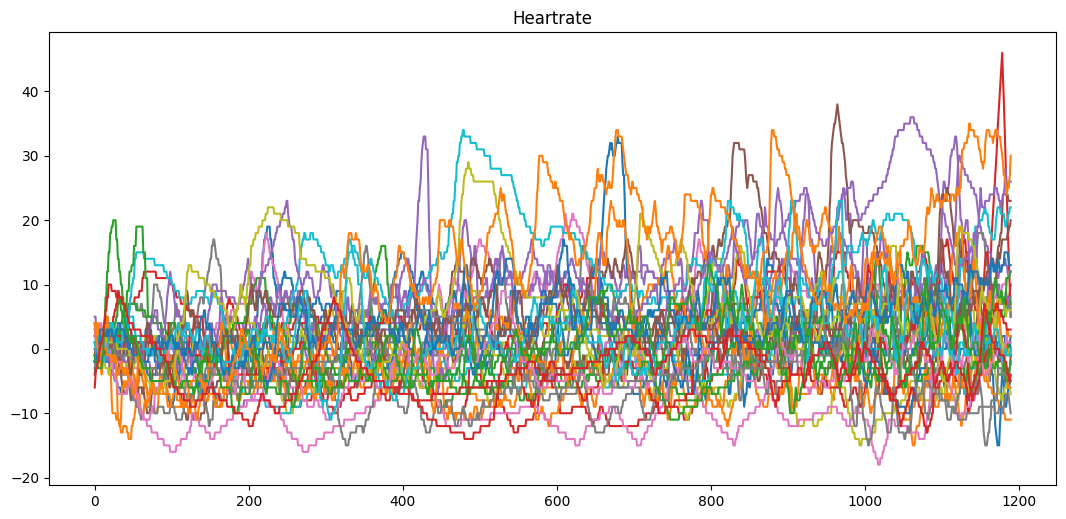

In [2969]:
realwage = pd.read_csv("partite.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
# X = pd.DataFrame({'x1':t,
#                    'x2': hb0})
col= realwage['Game0814-2']['b']['HR']
col = col[~np.isnan(col)]
dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']

for i in range(len(games)):
        dic['x'+str(i)+'b']=adjust(np.array(realwage[games[i]]['b']['HR']),len(realwage))
        dic['x'+str(i)+'w']=adjust(np.array(realwage[games[i]]['w']['HR']),len(realwage))
        col= realwage[games[i]]['b']['HR']
        col = col[~np.isnan(col)]
        #print(games[i], len(col))
heartrate = pd.DataFrame(dic)
time = realwage.index
plt.title('Heartrate')
plt.plot(heartrate)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

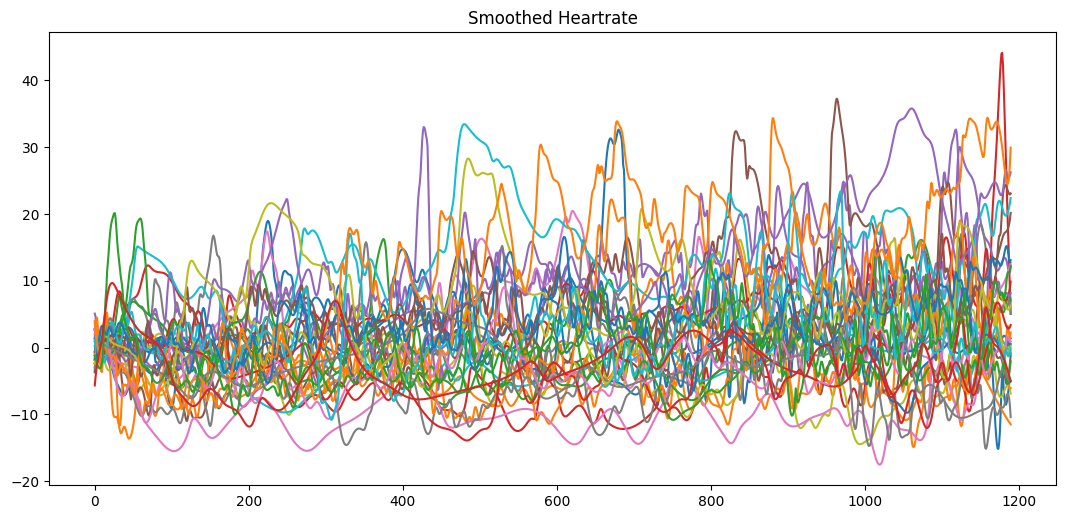

In [2970]:
from scipy import interpolate
dic1 ={}

for column in heartrate:
    time = np.array(range(len(heartrate[column].dropna(axis=0))))
    spl = UnivariateSpline(time, heartrate[column].dropna(axis=0))
    spl.set_smoothing_factor(200)
    #heartrate[column]= spl(time)
    plt.plot(spl(time))
    
plt.title('Smoothed Heartrate')


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

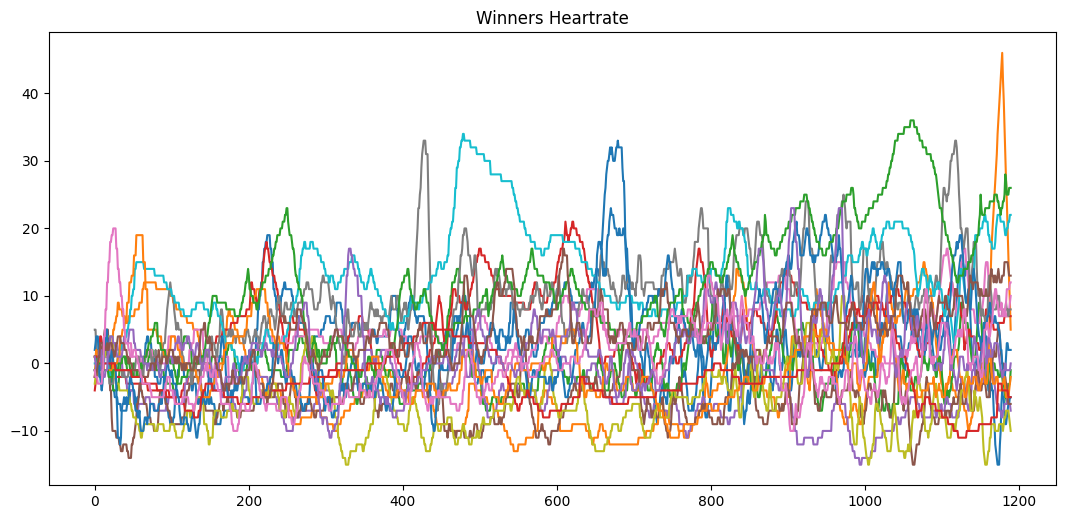

In [2971]:
winners = {'Game0814-2':'b', 'Game0816-6':'w', 'Game0816-1':'w', 'Game0816-7':'b', 'Game0813-3':'b', 'Game0813-4':'w', 'Game0529-2':'w', 'Game0529-5':'b', 'Game0813-2':'w', 'Game0529-4':'w', 'Game0529-3':'w', 'Game0814-1':'w', 'Game0816-2':'b', 'Game0816-5':'b', 'Game0816-4':'w', 'Game0816-3':'w', 'Game0529-1':'b', 'Game0813-1':'b'}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
dic_winners={}
dic_losers = {}
for el in games:
        if winners[el] == 'b':
                dic_winners[el+'b']=adjust(np.array(realwage[el]['b']['HR']), len(realwage))
                dic_losers[el+'w']=adjust(np.array(realwage[el]['w']['HR']),len(realwage))
        if winners[el] == 'w':
                dic_winners[el+'w']=adjust(np.array(realwage[el]['w']['HR']),len(realwage))
                dic_losers[el+'b']=adjust(np.array(realwage[el]['b']['HR']),len(realwage))

winn = pd.DataFrame(dic_winners)
lose = pd.DataFrame(dic_losers)

plt.plot(winn)
plt.title('Winners Heartrate')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

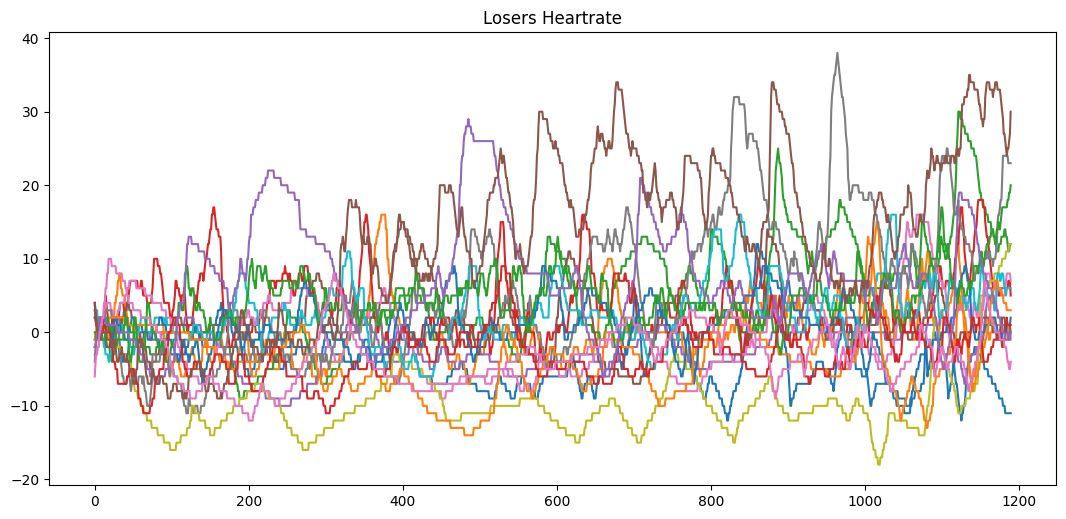

In [2972]:
plt.plot(lose)
plt.title('Losers Heartrate')
plt.show

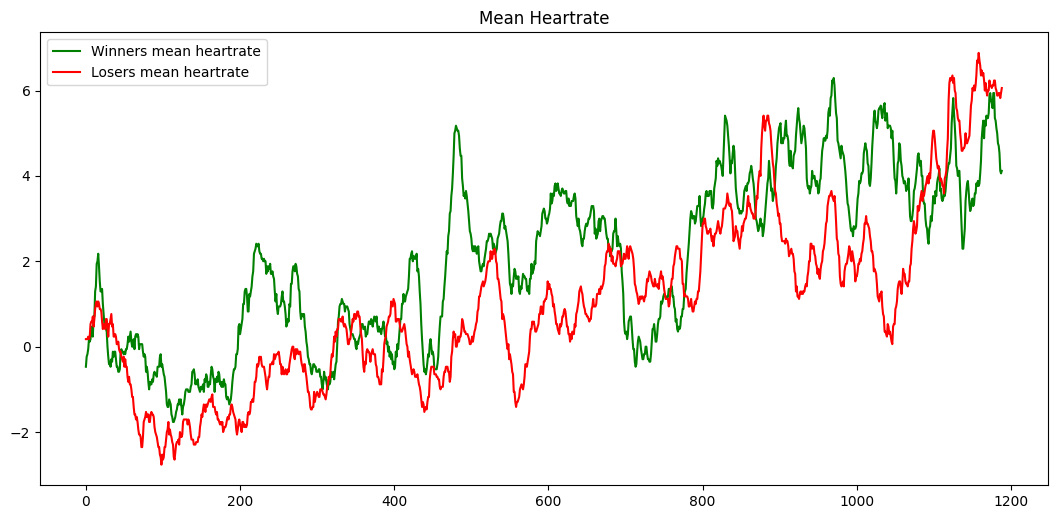

In [2975]:

timew = winn.index
mean_x_axisw = [i for i in range(max(time))]
mean_y_axisw = [(winn.loc[i]).mean() for i in mean_x_axisw]
# #hr_interp = [np.interp(mean_x_axis, time[i], hr[i]) for i in range(len(time))]

timel = lose.index
mean_x_axisl = [i for i in range(max(time))]
mean_y_axisl = [(lose.loc[i]).mean() for i in mean_x_axisl]
plt.plot(mean_x_axisw, mean_y_axisw, 'green')
plt.plot(mean_x_axisl,mean_y_axisl,'red')
plt.title('Mean Heartrate')
plt.legend(['Winners mean heartrate', 'Losers mean heartrate'])

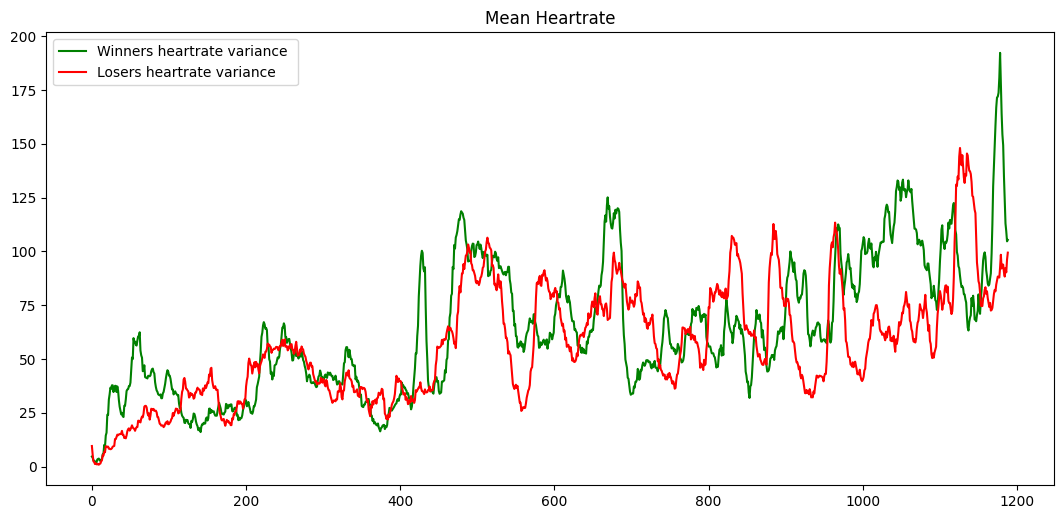

In [2977]:

timew = winn.index
mean_x_axisw = [i for i in range(max(time))]
mean_y_axisw = [(winn.loc[i]).var() for i in mean_x_axisw]
# #hr_interp = [np.interp(mean_x_axis, time[i], hr[i]) for i in range(len(time))]

timel = lose.index
mean_x_axisl = [i for i in range(max(time))]
mean_y_axisl = [(lose.loc[i]).var() for i in mean_x_axisl]
plt.plot(mean_x_axisw, mean_y_axisw, 'green')
plt.plot(mean_x_axisl,mean_y_axisl,'red')
plt.title('Mean Heartrate')
plt.legend(['Winners heartrate variance ', 'Losers heartrate variance '])

<function matplotlib.pyplot.show(close=None, block=None)>

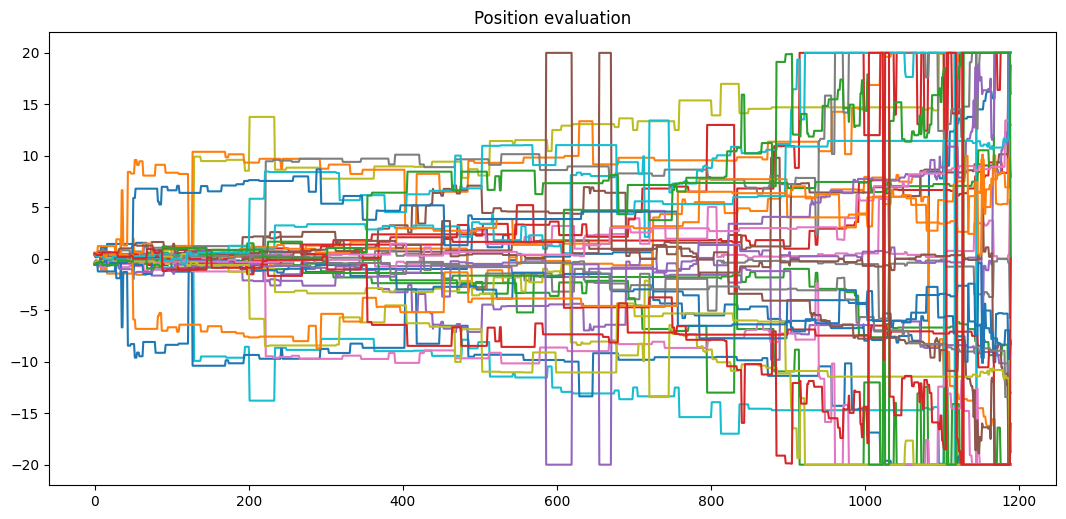

In [2978]:
realwage = pd.read_csv("partite.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
# X = pd.DataFrame({'x1':t,
#                    'x2': hb0})
realwage.dropna(axis=1)

dic = {}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
for i in range(len(games)):
        dic['x'+str(i)+'b']=adjust(np.array(realwage[games[i]]['b']['Evaluation']), len(realwage))
        dic['x'+str(i)+'w']=adjust(np.array(realwage[games[i]]['w']['Evaluation']),len(realwage))
evaluation = pd.DataFrame(dic)
time = realwage.index
plt.plot(evaluation)
plt.title('Position evaluation')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

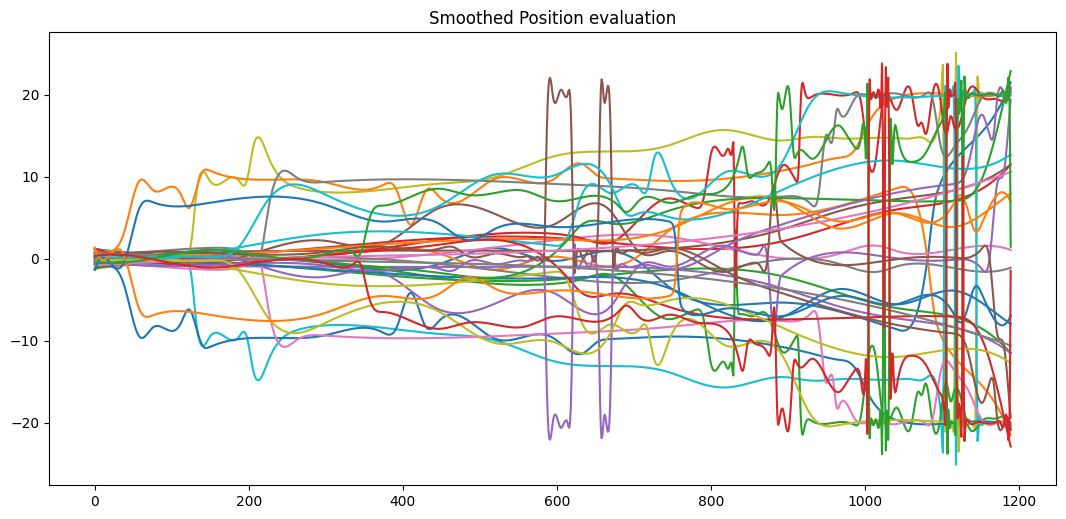

In [2979]:
from scipy import interpolate
dic1 ={}

for column in evaluation:
    time = np.array(range(len(evaluation[column].dropna(axis=0))))
    spl = UnivariateSpline(time, evaluation[column].dropna(axis=0))
    spl.set_smoothing_factor(1000)
    #evaluation[column]= spl(time)
    plt.plot(spl(time))
    


plt.title('Smoothed Position evaluation')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

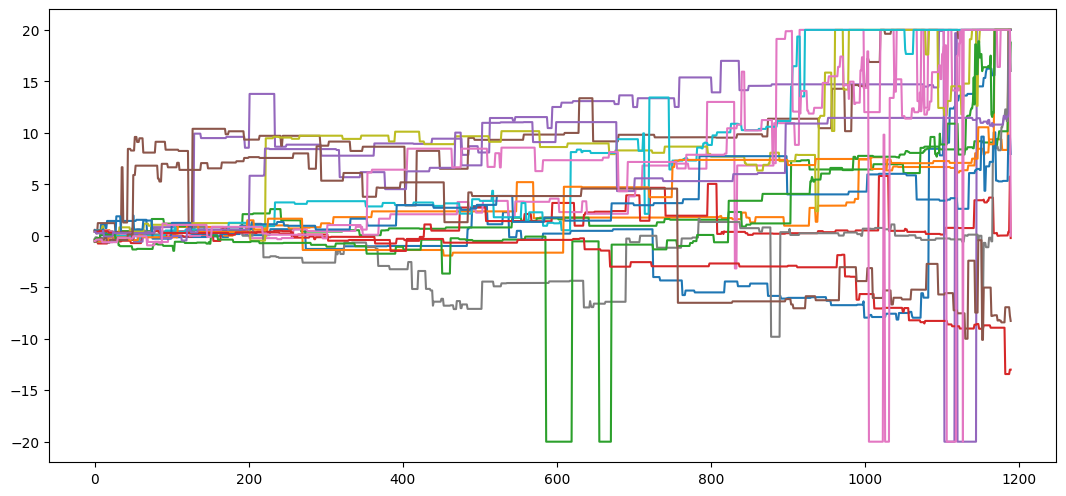

In [2938]:
winners = {'Game0814-2':'b', 'Game0816-6':'w', 'Game0816-1':'w', 'Game0816-7':'b', 'Game0813-3':'b', 'Game0813-4':'w', 'Game0529-2':'w', 'Game0529-5':'b', 'Game0813-2':'w', 'Game0529-4':'w', 'Game0529-3':'w', 'Game0814-1':'w', 'Game0816-2':'b', 'Game0816-5':'b', 'Game0816-4':'w', 'Game0816-3':'w', 'Game0529-1':'b', 'Game0813-1':'b'}
games = ['Game0814-2', 'Game0816-6', 'Game0816-1', 'Game0816-7', 'Game0813-3', 'Game0813-4', 'Game0529-2', 'Game0529-5', 'Game0813-2', 'Game0529-3', 'Game0814-1', 'Game0816-2', 'Game0816-5', 'Game0816-4', 'Game0816-3', 'Game0529-1', 'Game0813-1']
dic_winners_eval={}
dic_losers_eval = {}
for el in games:
        if winners[el] == 'b':
                dic_winners_eval[el+'b']=adjust(np.array(realwage[el]['b']['Evaluation']),len(realwage))
                dic_losers_eval[el+'w']=adjust(np.array(realwage[el]['w']['Evaluation']),len(realwage))
        if winners[el] == 'w':
                dic_winners_eval[el+'w']=adjust(np.array(realwage[el]['w']['Evaluation']),len(realwage))
                dic_losers_eval[el+'b']=adjust(np.array(realwage[el]['b']['Evaluation']),len(realwage))

winn_eval = pd.DataFrame(dic_winners_eval)
lose_eval = pd.DataFrame(dic_losers_eval)

plt.plot(winn_eval)
plt.show

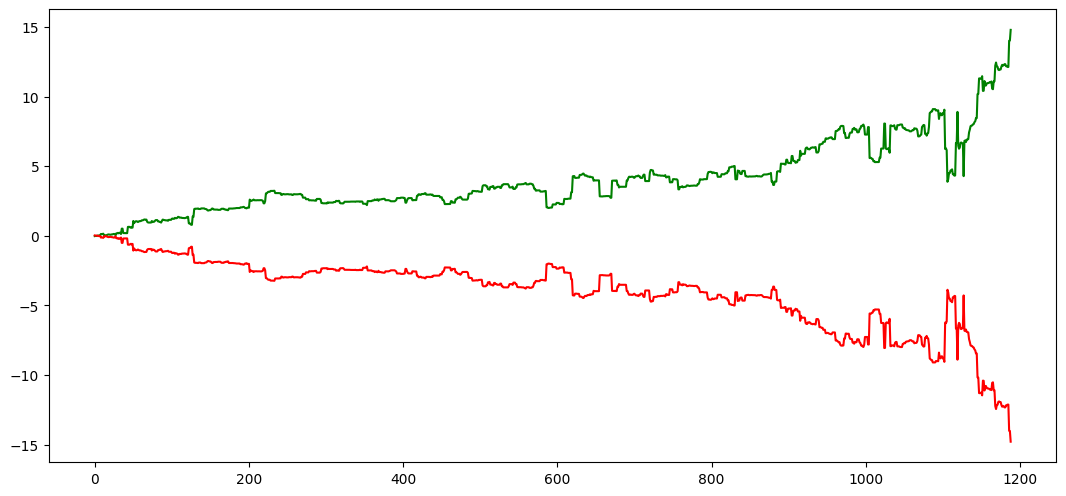

In [2939]:
timew = winn_eval.index
mean_x_axisw_eval = [i for i in range(max(time))]
mean_y_axisw_eval = [(winn_eval.loc[i]).mean() for i in mean_x_axisw_eval]

timel = lose_eval.index
mean_x_axisl_eval = [i for i in range(max(time))]
mean_y_axisl_eval = [(lose_eval.loc[i]).mean() for i in mean_x_axisl_eval]
plt.plot(mean_x_axisw_eval, mean_y_axisw_eval, 'green')
plt.plot(mean_x_axisl_eval,mean_y_axisl_eval,'red')

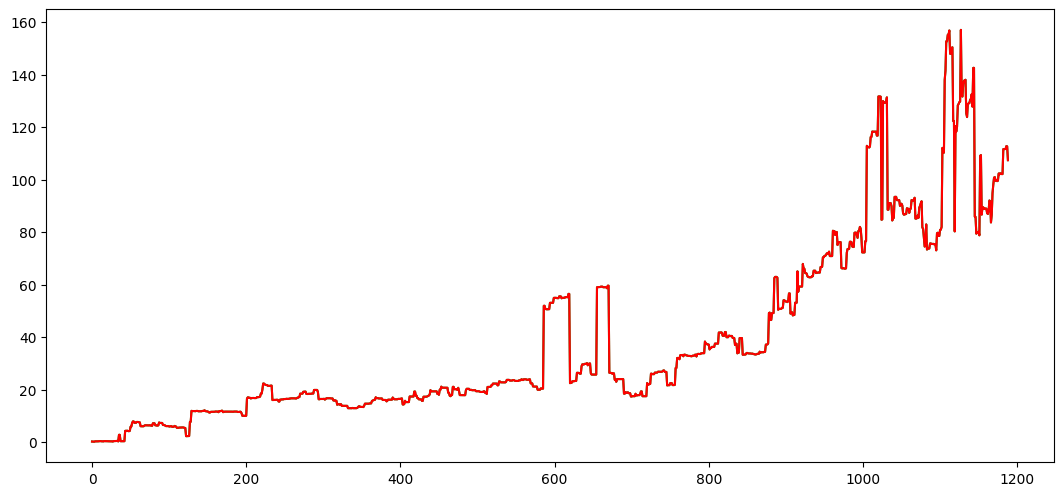

In [2940]:
#le due sono ovviamente le stesse, quindi si sovrascrivono
timew = winn_eval.index
mean_x_axisw_eval = [i for i in range(max(time))]
mean_y_axisw_eval = [(winn_eval.loc[i]).var() for i in mean_x_axisw_eval]

timel = lose_eval.index
mean_x_axisl_eval = [i for i in range(max(time))]
mean_y_axisl_eval = [(lose_eval.loc[i]).var() for i in mean_x_axisl_eval]
plt.plot(mean_x_axisw_eval, mean_y_axisw_eval, 'green')
plt.plot(mean_x_axisl_eval,mean_y_axisl_eval,'red')

In [2941]:
heartrate.to_csv('heartrate.csv', index = False)
evaluation.to_csv('evaluation.csv', index = False)

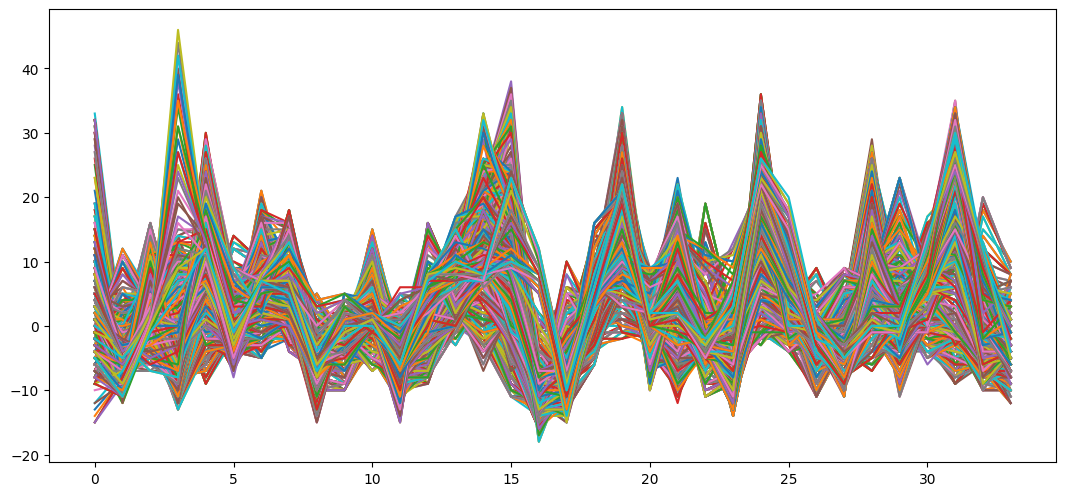

In [2942]:
from FDApy.misc.loader import read_csv
from FDApy.preprocessing.dim_reduction.fpca import UFPCA
from FDApy.visualization.plot import plot
from FDApy.representation.functional_data import (DenseFunctionalData, IrregularFunctionalData, FunctionalData)
HR_FDA = read_csv('heartrate.csv')
EVAL_FDA = read_csv('evaluation.csv')
HR_FDA.smooth

_ = plot(HR_FDA)

In [2943]:
import skfda
heartrate = pd.read_csv('heartrate.csv')
# time = (heartrate.index).to_numpy()
heartrate = heartrate.to_numpy()
fd = skfda.FDataGrid(data_matrix=heartrate)


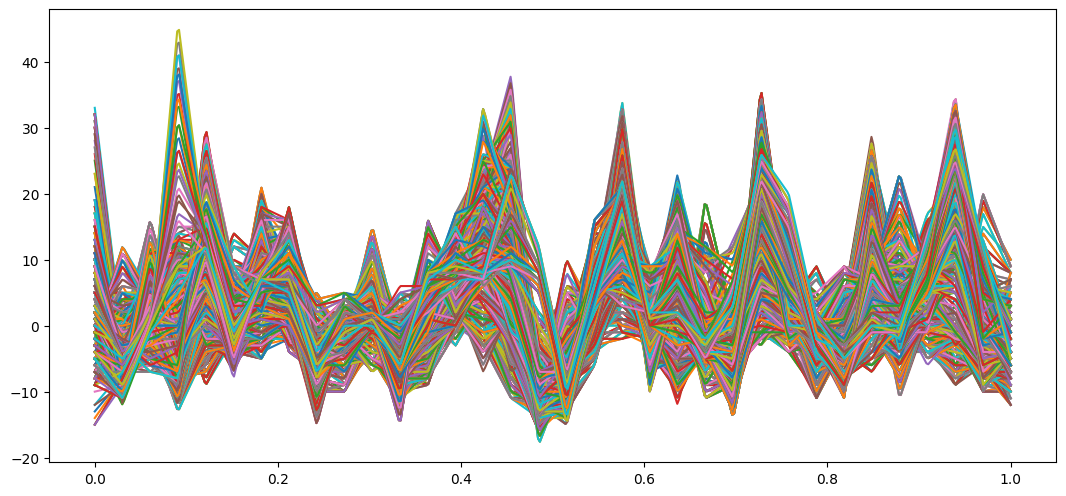

In [2944]:
fd.plot()
plt.show()

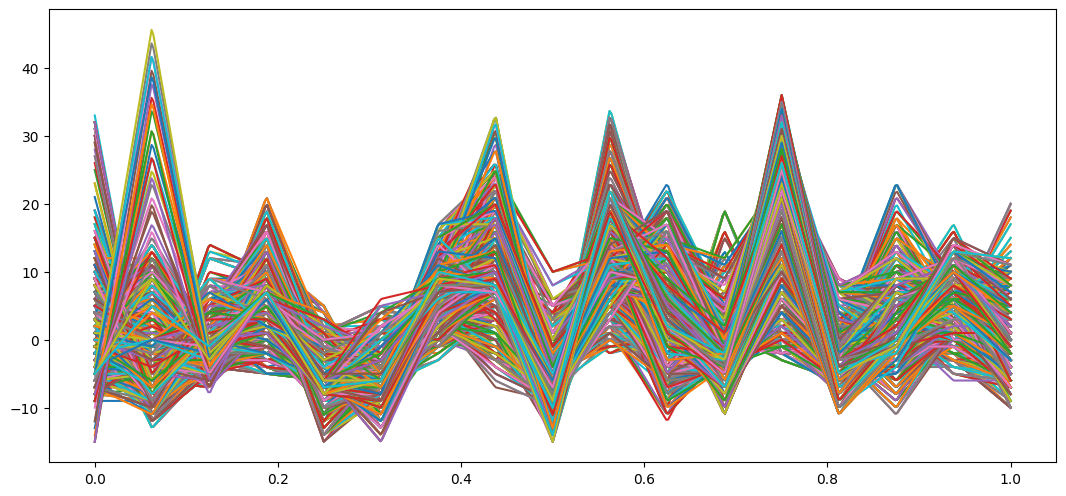

In [2945]:
winners =  skfda.FDataGrid(data_matrix=winn.to_numpy())
winners.plot()
plt.show()

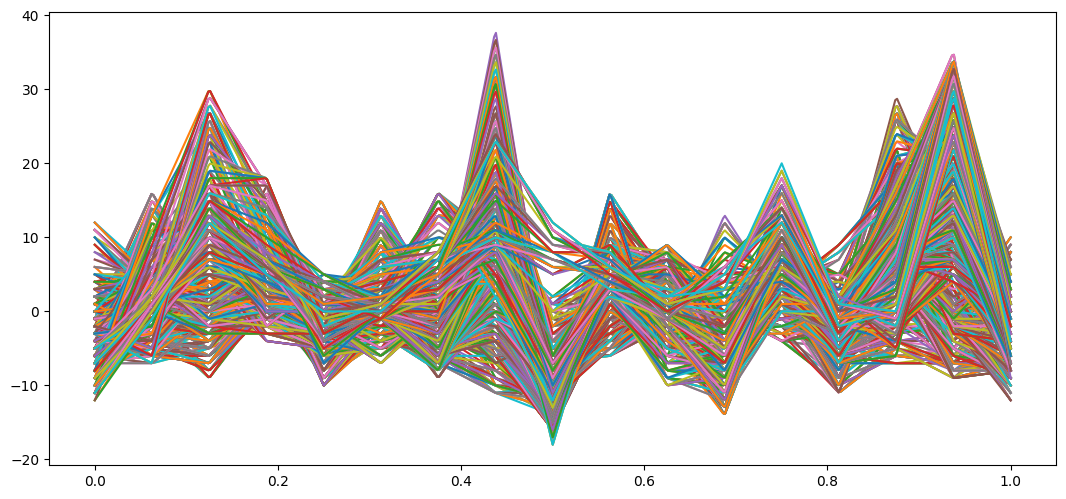

In [2946]:
losers =  skfda.FDataGrid(data_matrix=lose.to_numpy())
losers.plot()
plt.show()

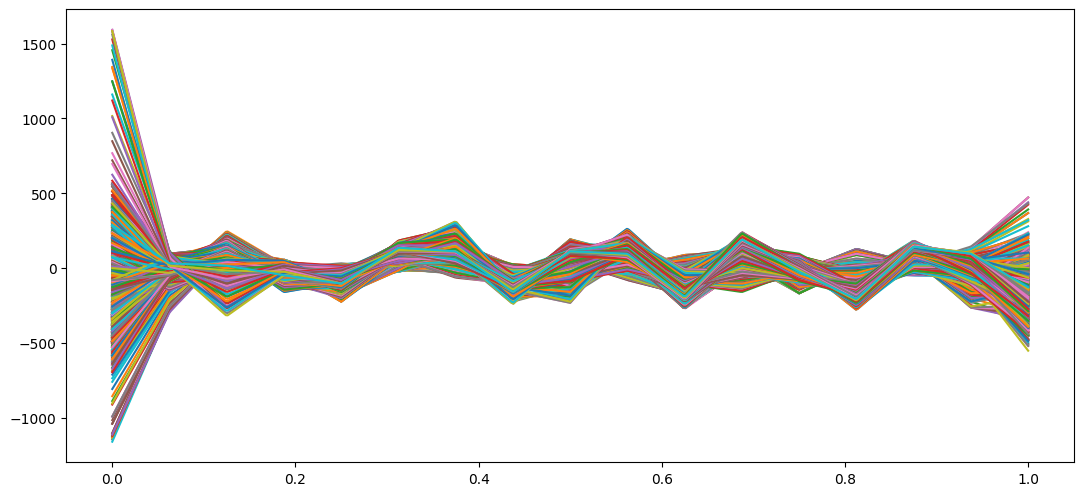

In [2961]:
fdd = winners.derivative(order = 1)
#fdd.dataset_name = "winners derivative"
fig = fdd.plot()


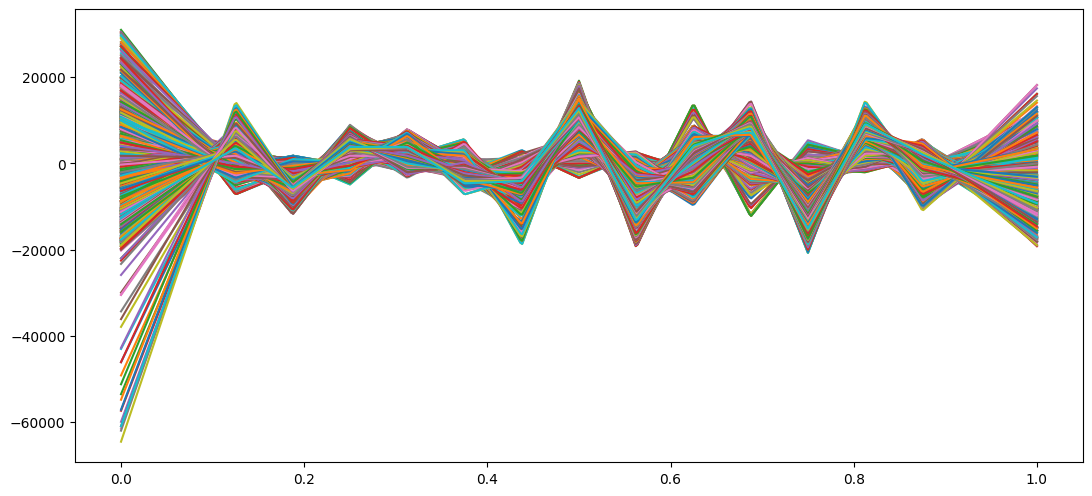

In [2948]:
fdsecond = winners.derivative(order=2)
fdd.dataset_name = "winners second derivative"
fig = fdsecond.plot()

The example is going to be divided in three different groups. Then we are going to apply the ANOVA procedure to this groups to test if the means of this three groups are equal or not.
Functionality to perform One-way ANOVA analysis, to compare means among different samples. One-way stands for one functional response variable and one unique variable of input.
Perform one-way functional ANOVA.

This function implements an asymptotic method to test the following null hypothesis:

Let $ {X_i}_{i=1}^k $ be a set of $ k $ independent samples each one with $ n_i $ trajectories, and let $ E(X_i) = m_i(t) $.
The null hypothesis is defined as:
$$ H_0 = m_1(t)= ...= m_k (t) $$
This function calculates the value of the statistic v_sample_stat() $ V_n $ with the means of the given samples. Under the null hypothesis this statistic is asymptotically equivalent to v_asymptotic_stat(), where each sample is replaced by a gaussian process, with mean zero and the same covariance function as the original.

The simulation of the distribution of the asymptotic statistic $ V $ is implemented using a bootstrap procedure. One observation of the $ k $ different gaussian processes defined above is simulated, and the value of v_asymptotic_stat() is calculated. This procedure is repeated n_reps times, creating a sampling distribution of the statistic.

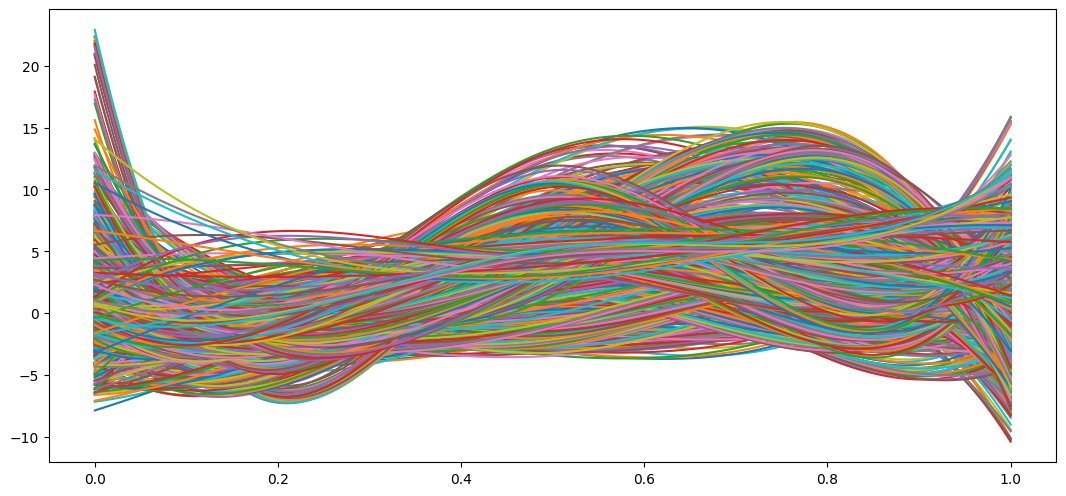

In [2949]:
#nell'esempio usa fourier noi invece usiamo Bspline per il motivo che ha detto Fede
#The functions will then be projected to the functional basis, solving a least squares problem in order to find the 
# optimal coefficients of the expansion
basis = skfda.representation.basis.BSpline(n_basis=5)
W_basis = winners.to_basis(basis)
W_basis.plot()
plt.show()


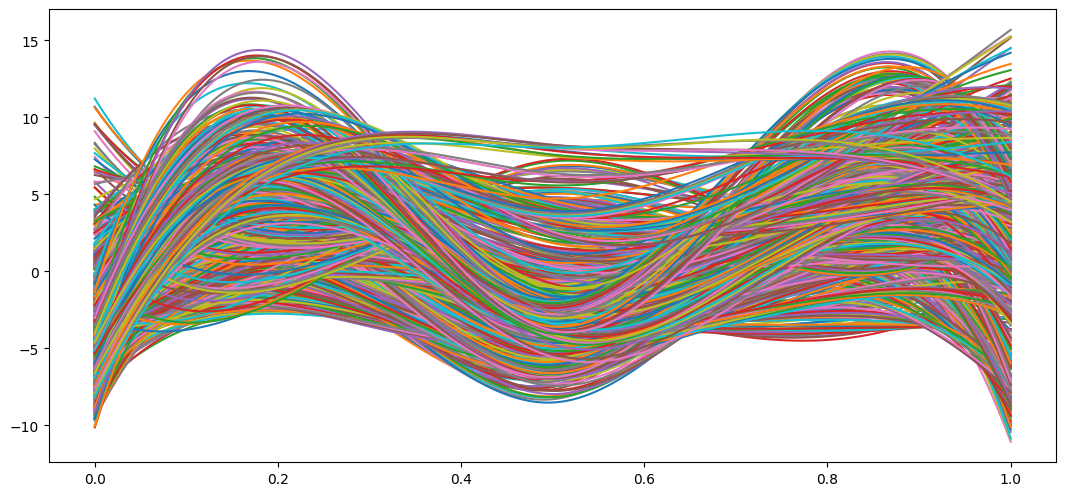

In [2950]:
basis = skfda.representation.basis.BSpline(n_basis=5)
L_basis = losers.to_basis(basis)
L_basis.plot()
plt.show()

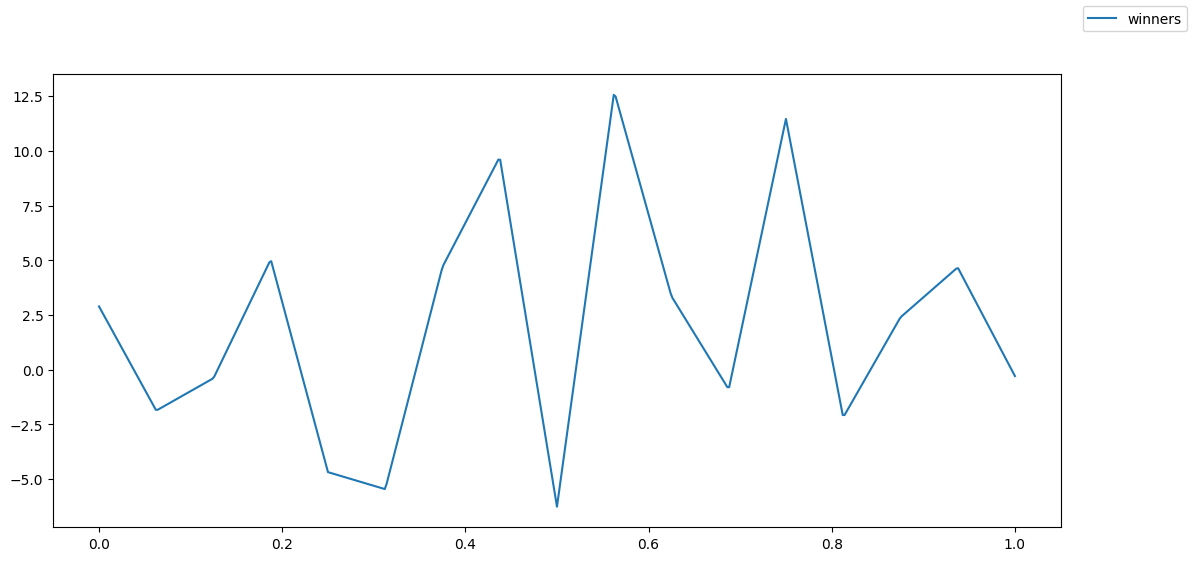

In [2965]:
# total_row = len(games)
# win1 = winners[0:6]
# win2 = winners[6:12]
# win3 = winners[12:17]
# #winners.plot(group=[0 if i < 6 else 1 if i < 12 else 16 for i in range(17)])
# means = [win1.mean(), win2.mean(), win3.mean()]
# fd_means = skfda.concatenate(means)
# fig = fd_means.plot()

total_row = len(games)
means_w = [winners.mean()]
fd_means = skfda.concatenate(means_w)
fig = fd_means.plot()


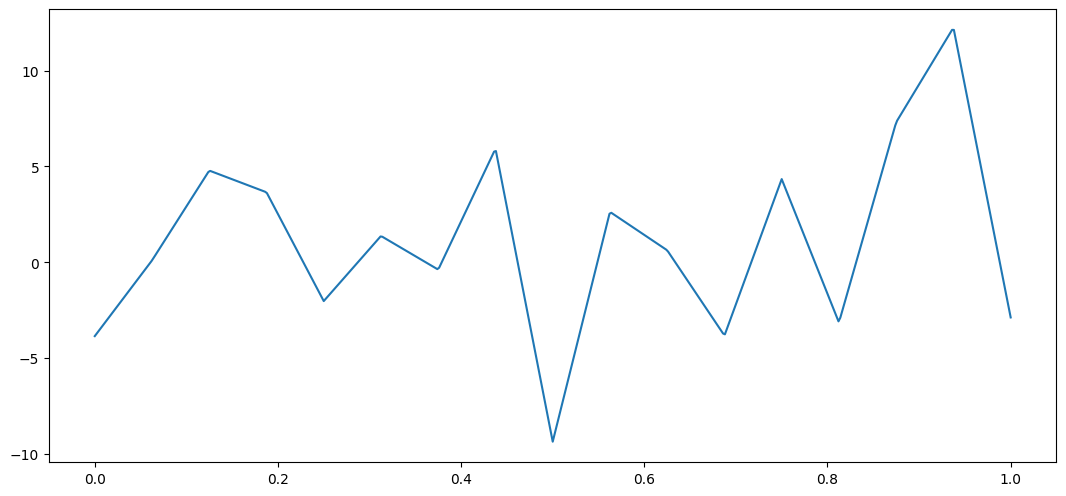

In [2952]:
# total_row = len(games)
# los1 = losers[0:6]
# los2 = losers[6:12]
# los3 = losers[12:17]
# #losers.plot(group=[0 if i < 6 else 1 if i < 12 else 16 for i in range(17)])
# means = [los1.mean(), los2.mean(), los3.mean()]
# fd_means = skfda.concatenate(means)
# fig = fd_means.plot()

total_row = len(games)
means_l = [losers.mean()]
fd_means_l = skfda.concatenate(means_l)
fig = fd_means_l.plot()

In [2953]:
from skfda.inference.anova import oneway_anova
stat_value, p_value, distribution= oneway_anova(winners,losers, n_reps=1500,return_dist=True)
print('Statistic: ', stat_value)
print('p-value: ', p_value)
print('distribution', distribution)

Statistic:  32156.643259803914
p-value:  0.0
distribution [ 29.11032169  57.16044216  83.3581226  ...  50.03264374  50.420606
 127.19592171]


Example with the losers

In [2954]:
# total_row = len(games)
# los1 = losers[0:6]
# los2 = losers[6:12]
# los3 = losers[12:17]
# #losers.plot(group=[0 if i < 6 else 1 if i < 12 else 16 for i in range(17)])
# means = [los1.mean(), los2.mean(), los3.mean()]
# fd_means = skfda.concatenate(means)
# fig = fd_means.plot()

In [2955]:
# statistic_value, p_value, distribution = oneway_anova(los1, los2, los3, n_reps=1500,return_dist=True)

# print('Statistic: ', statistic_value)
# print('p-value: ', p_value)
# print('Distribution: ', distribution)

Ultimo considerando a confronti i due gruppi di battiti, vincenti vs perdenti

In [2956]:
basis = skfda.representation.basis.BSpline(n_basis=5)
L_basis = losers.to_basis(basis)
W_basis = winners.to_basis(basis)

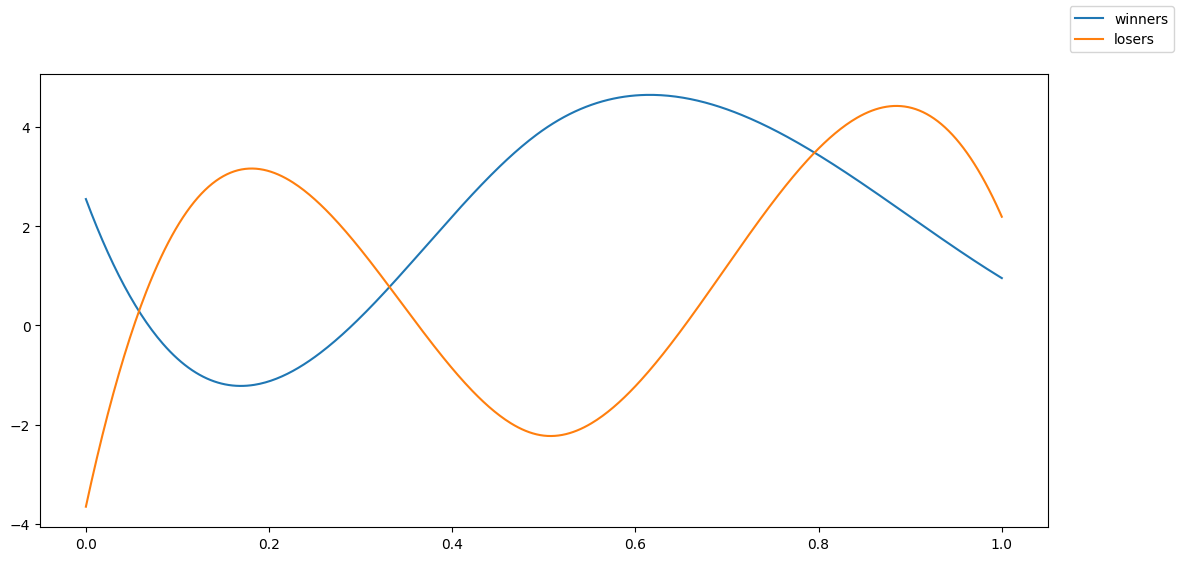

In [2966]:
# means = [W_basis.mean(), L_basis.mean()]
means = [W_basis.mean(), L_basis.mean()]

fd_means = skfda.concatenate(means)
fig = fd_means.plot()
fig.legend(['winners','losers'])



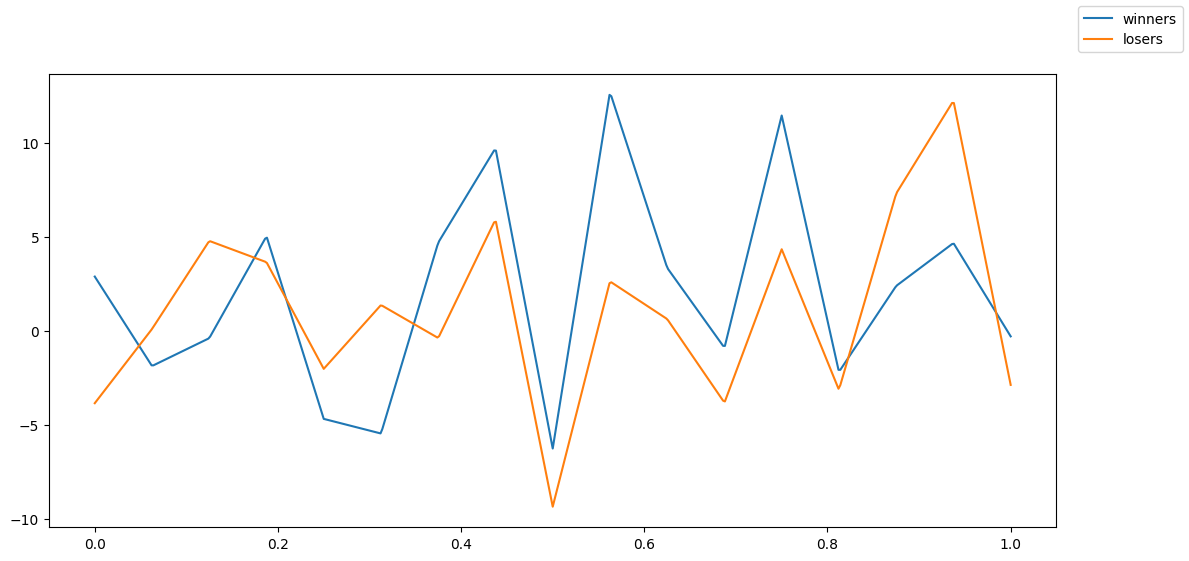

In [2968]:
# means = [W_basis.mean(), L_basis.mean()]
means = [winners.mean(), losers.mean()]

fd_means = skfda.concatenate(means)
fig = fd_means.plot()
fig.legend(['winners','losers'])

In [2959]:
statistic_value, p_value, distribution = oneway_anova(W_basis, L_basis, n_reps=1500,return_dist=True)

print('Statistic: ', statistic_value)
print('p-value: ', p_value)
print('Distribution: ', distribution)

Statistic:  15643.470627638402
p-value:  0.0
Distribution:  [69.38481812 33.89968963 10.44911932 ... 42.05086188  9.92834831
  6.39739583]


Neighbors Functional Regression